In [1]:
import numpy as  np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm
import sys

from scipy import interpolate

sys.path.insert(0, '/home/sophia/bachelor_thesis_ipython_notebooks')

from GC_Orbit_class import GCorbit

%matplotlib inline

In [2]:
#data: need actions J_r, J_phi, J_theta
if 0:
    r_3d,x,y,z,vx,vy,vz=np.loadtxt('C:\\Users\Sophia Milanov\Documents\Bachelorarbeit\data\\x-y-z.dat', usecols=(1,30,31,32,33,34,35), unpack=True)
elif 1:
    r_3d,x,y,z,vx,vy,vz=np.loadtxt('/home/sophia/Dokumente/Bachelorarbeit-2/x-y-z.dat', usecols=(1,30,31,32,33,34,35), unpack=True)
else:
    r_3d,x,y,z,vx,vy,vz=np.loadtxt('/home/milanov/Bachelorarbeit/x-y-z.dat', usecols=(1,30,31,32,33,34,35), unpack=True)

In [3]:
r,rho=np.loadtxt('densityfile.txt', usecols=(1,2), unpack=True)
#r=np.logspace(0,100,10)
#b=100.
#b2=b**2.
#z0=0.
#r2= r**2.+z0**2.
#rb= np.sqrt(r2+b2)
#rho1=(3.*(b+rb)*rb**2.-r2*(b+3.*rb))/rb**3./(b+rb)**3./4./np.pi
#rho2=3./4./np.pi*b2*(r**2.+b2)**(-2.5)
#rho3=np.array((8000,5000,3000,1000,500,100,50,10,1,0.1))
test=GCorbit(inputfilename='densityfile.txt')

In [4]:
#s=interpolate.InterpolatedUnivariateSpline(np.log(r[:]),np.log(rho[:]))

In [6]:
#plt.loglog(r,rho,r,s(r))
#plt.xlim(1e-1,1e2)
#plt.ylim(0,10000)

In [7]:
n=5000
J_phi=np.zeros(n)
J_theta=np.zeros(n)
J_r=np.zeros(n)
for i in range(n):
    J_phi[i]=test.actions(x=x[i],y=y[i],z=z[i],vx=vx[i],vy=vy[i],vz=vz[i],density=test.density(r_3d[i]))[0]
    J_theta[i]=test.actions(x=x[i],y=y[i],z=z[i],vx=vx[i],vy=vy[i],vz=vz[i],density=test.density(r_3d[i]))[1]
    J_r[i]=test.actions(x=x[i],y=y[i],z=z[i],vx=vx[i],vy=vy[i],vz=vz[i],density=test.density(r_3d[i]))[2]
#J_phi,J_theta,J_r=test.actions(x=x[n],y=y[n],z=z[n],vx=vx[n],vy=vy[n],vz=vz[n],density=test.density(r_3d[n]))
#print(J_phi,J_r,J_theta)
J_r_new=np.nan_to_num(J_r)

np.savetxt(())

/home/sophia/bachelor_thesis_ipython_notebooks/GC_Orbit_class.py:341: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(2.*E-2.*pot-L**2./r**2.)
/home/sophia/anaconda3/lib/python3.4/site-packages/scipy/integrate/quadpack.py:352: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.
  warnings.warn(msg, IntegrationWarning)
/home/sophia/bachelor_thesis_ipython_notebooks/GC_Orbit_class.py:63: RuntimeWarning: invalid value encountered in log
  return np.exp(self.s(np.log(r)))
/home/sophia/anaconda3/lib/python3.4/site-packages/scipy/optimize/minpack.py:237: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


In [ ]:
#fig = plt.figure(figsize=(8,8))
#ax = fig.add_subplot(111, projection='3d')
#ax.scatter(x,y,z) #zu testzwecken mit x,y,z; eigentlich J_phi,J_theta,J_r
#ax.set_xlabel("J_phi") #einheit
#ax.set_ylabel('J_theta') #einheit
#ax.set_zlabel("J_r") #einheit
#ax.set_title('actions')
#fig.savefig('./Plots/action_scatter_3d')

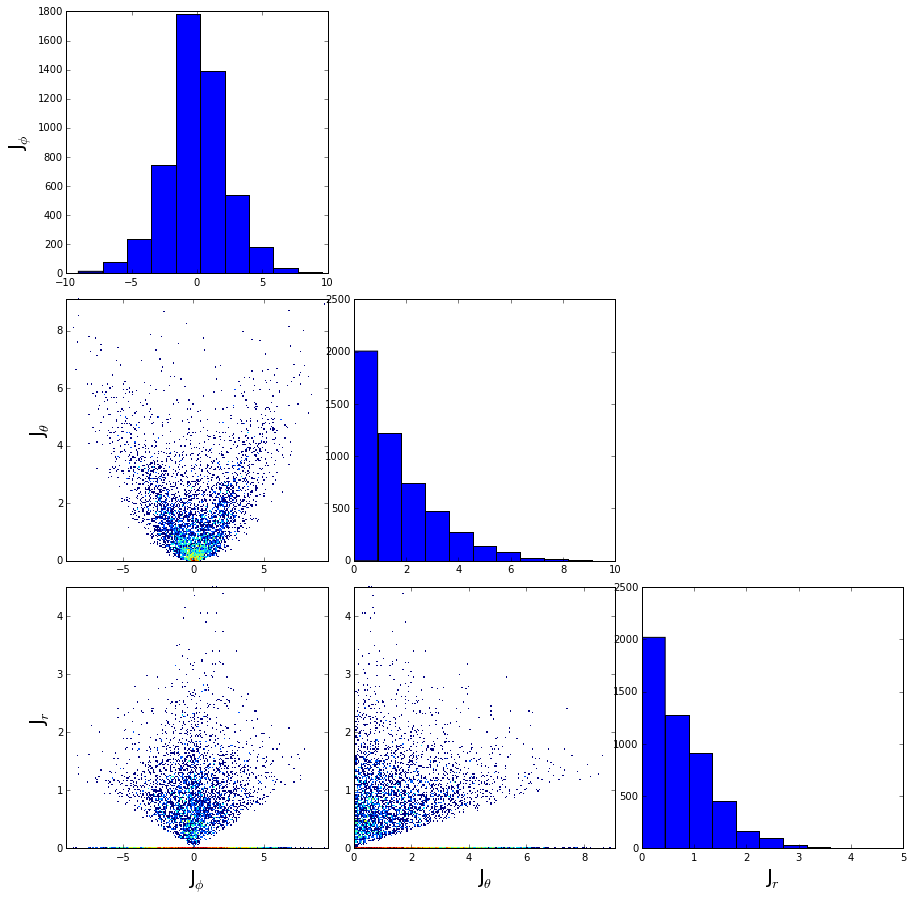

In [8]:
##### Versuch vom Triangle Plot

fig,axes=plt.subplots(nrows=3,ncols=3,figsize=(15,15))
n0, bins0, patches0=axes[0,0].hist(J_phi,10) #J_phi
n1, bins1, patches1=axes[1,1].hist(J_theta,10) #J_theta
n2, bins2, patches2=axes[2,2].hist(J_r_new,10) #J_r

H0, xedges0, yedges0, img0 = axes[1,0].hist2d(J_phi, J_theta, bins=200,norm=LogNorm()) #J_phi,J_theta
H1, xedges1, yedges1, img0 = axes[2,1].hist2d(J_theta, J_r_new, bins=200, norm=LogNorm()) #J_theta, J_r
H2, xedges2, yedges2, img0 = axes[2,0].hist2d(J_phi, J_r_new, bins=200, norm=LogNorm()) #J_phi, J_r

axes[0,1].axis('off')
axes[0,2].axis('off')
axes[1,2].axis('off')

axes[2,0].set_xlabel('J$_\phi$', fontsize=20)
axes[2,1].set_xlabel('J$_\\theta$', fontsize=20)
axes[2,2].set_xlabel('J$_r$', fontsize=20)
axes[1,0].set_ylabel('J$_\\theta$', fontsize=20)
axes[2,0].set_ylabel('J$_r$', fontsize=20)
axes[0,0].set_ylabel('J$_\phi$', fontsize=20)

#axes[1,0].set_aspect('equal')
#axes[2,0].set_aspect('equal')
#axes[2,1].set_aspect('equal')

fig.subplots_adjust(hspace=0.1,wspace=0.1)

anpassen:
---

-abstand der subplots

-histogram grenzen

-ticks

-beschriftung der ticks


In [10]:
print(J_r_new)

[ 0.          0.107464    0.0581426  ...,  0.          0.68645101
  1.76720297]
